In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [13]:
df=pd.read_csv('finalreport.csv')

In [14]:
df

,Unnamed: 0,operating_airline,operating_airline_iata_code,published_airline,published_airline_iata_code,geo_summary,geo_region,landing_aircraft_type,aircraft_body_type,aircraft_manufacturer,aircraft_model,landing_count,total_landed_weight,year,month
0,0,SkyWest Airlines,OO,United Airlines,UA,International,Canada,Passenger,Regional Jet,Bombardier,CRJ2,30,1410000,2018,9
1,1,Air Canada,AC,Air Canada,AC,International,Canada,Passenger,Narrow Body,Airbus,A320,125,17787978,2018,9
2,2,Japan Airlines,JL,Japan Airlines,JL,International,Asia,Passenger,Wide Body,Boeing,B773,30,16620000,2018,9
3,3,"COPA Airlines, Inc.",CM,"COPA Airlines, Inc.",CM,International,Central America,Passenger,Narrow Body,Boeing,B739,3,491700,2018,9
4,4,Hong Kong Airlines Limited,HX,Hong Kong Airlines Limited,HX,International,Asia,Passenger,Wide Body,Airbus,A359,16,7301712,2018,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21967,22042,SkyWest Airlines,OO,Delta Air Lines,DL,Domestic,US,Passenger,Regional Jet,Bombardier,CRJ,155,7285000,2005,7
21968,22043,SkyWest Airlines,OO,United Airlines - Pre 07/01/2013,UA,Domestic,US,Passenger,Regional Jet,Bombardier,CRJ,268,17956000,2005,7
21969,22044,SkyWest Airlines,OO,United Airlines - Pre 07/01/2013,UA,International,Canada,Passenger,Regional Jet,Bombardier,CRJ,62,4154000,2005,7
21970,22045,SkyWest Airlines,OO,United Airlines - Pre 07/01/2013,UA,Domestic,US,Passenger,Regional Jet,Bombardier,CRJ,1360,63920000,2005,7


<AxesSubplot:>

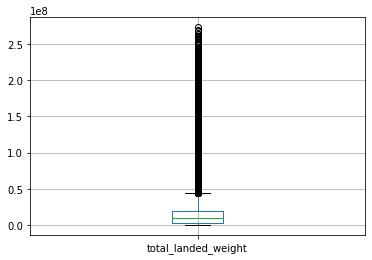

In [15]:
df.boxplot('total_landed_weight')

In [18]:
df.isnull().sum()

Unnamed: 0                     0
operating_airline              0
operating_airline_iata_code    0
published_airline              0
published_airline_iata_code    0
geo_summary                    0
geo_region                     0
landing_aircraft_type          0
aircraft_body_type             0
aircraft_manufacturer          0
aircraft_model                 0
landing_count                  0
total_landed_weight            0
year                           0
month                          0
dtype: int64

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'landing_count'}>],
       [<AxesSubplot:title={'center':'total_landed_weight'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'month'}>, <AxesSubplot:>]],
      dtype=object)

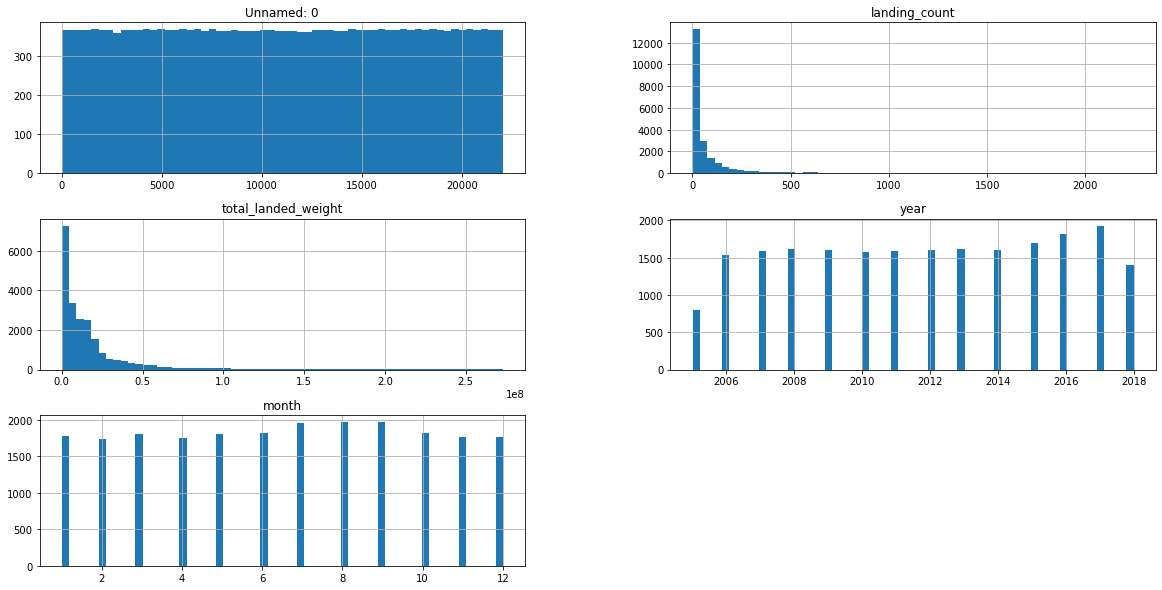

In [19]:
df.hist(bins=60,figsize=(20,10))

In [91]:
outliers=[]
def detect_outliers(data):
    threshold=3
    mean=np.mean(data)
    std=np.std(data)
    
    for i in data:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers

In [100]:
outlier_pt=detect_outliers(df['landing_count'])

In [101]:
(outlier_pt)

[1347,
 1085,
 1233,
 1304,
 1428,
 1140,
 1660,
 1445,
 929,
 1566,
 1268,
 1549,
 882,
 1176,
 1695,
 912,
 1680,
 1464,
 1278,
 1278,
 1161,
 1299,
 1148,
 1069,
 1575,
 1607,
 915,
 878,
 1538,
 1217,
 1705,
 1318,
 1065,
 897,
 1221,
 1457,
 953,
 1207,
 1693,
 1440,
 1269,
 1040,
 1205,
 975,
 1320,
 1159,
 1401,
 1192,
 1091,
 1026,
 1714,
 1090,
 1147,
 1149,
 1403,
 943,
 1053,
 870,
 1166,
 1076,
 1233,
 1005,
 1006,
 1193,
 1254,
 1248,
 1168,
 1089,
 1676,
 1095,
 1221,
 1143,
 1345,
 1220,
 962,
 1027,
 1609,
 1117,
 1618,
 1342,
 1319,
 1052,
 1192,
 977,
 1296,
 1542,
 1284,
 1143,
 1190,
 876,
 1499,
 1418,
 1449,
 1653,
 1274,
 951,
 926,
 1183,
 1178,
 1633,
 1270,
 893,
 993,
 1074,
 1509,
 1074,
 1614,
 1406,
 1167,
 1358,
 959,
 878,
 1290,
 1435,
 1174,
 1633,
 1045,
 900,
 1092,
 1145,
 1514,
 1271,
 947,
 1390,
 900,
 1127,
 1054,
 1552,
 900,
 941,
 974,
 1375,
 1144,
 1367,
 1557,
 869,
 1039,
 1037,
 881,
 1377,
 1637,
 1036,
 1024,
 900,
 1384,
 990,
 864,
 

In [ ]:
outliers=[]
def detect_outliers(data):
    threshold=3
    mean=np.mean(data)
    std=np.std(data)
    
    for i in data:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers

In [110]:
(df['landing_count'])

0          30
1         125
2          30
3           3
4          16
         ... 
21967     155
21968     268
21969      62
21970    1360
21971    1655
Name: landing_count, Length: 21972, dtype: int64

In [105]:
quantile1,quantile3=np.percentile(df['landing_count'],[25,75])

In [106]:
print(quantile1,quantile3)

14.0 83.0


In [107]:
df['landing_count'].describe()

count    21972.000000
mean       113.755188
std        249.971438
min          1.000000
25%         14.000000
50%         31.000000
75%         83.000000
max       2245.000000
Name: landing_count, dtype: float64

In [108]:
iqr_value=quantile3-quantile1

In [109]:
print(iqr_value)

69.0


In [112]:
lower_bound_val=quantile1-(1.5*iqr_value)
upper_bound_val=quantile3+(1.5*iqr_value)

In [113]:
print(lower_bound_val,upper_bound_val)

-89.5 186.5


In [131]:
df['landing_count']=np.where(df['landing_count']>261,261,df['landing_count'])

In [132]:
df['landing_count'].describe()

count    21972.000000
mean        58.472738
std         62.147656
min          1.000000
25%         14.000000
50%         31.000000
75%         83.000000
max        186.500000
Name: landing_count, dtype: float64

<AxesSubplot:xlabel='landing_count'>

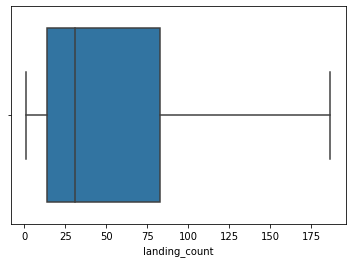

In [133]:
sns.boxplot(x='landing_count',data=df)

<AxesSubplot:xlabel='total_landed_weight'>

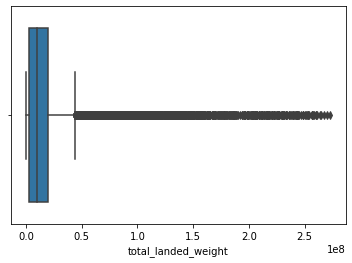

In [20]:
sns.boxplot(x='total_landed_weight',data=df)

In [118]:
quantile1,quantile3=np.percentile(df['total_landed_weight'],[25,75])

In [119]:
print(quantile1,quantile3)

3093086.0 50000000.0


In [122]:
iqr=quantile3-quantile1
print(iqr)

46906914.0


In [123]:
lower_bound_val=quantile1-(1.5*iqr_value)
upper_bound_val=quantile3+(1.5*iqr_value)
print(lower_bound_val,upper_bound_val)

3092982.5 50000103.5


In [134]:
df['total_landed_weight']=np.where(df['total_landed_weight']>45298970,45298970,df['total_landed_weight'])

In [138]:
df['total_landed_weight']=np.where(df['total_landed_weight']<572000,572000,df['total_landed_weight'])

<AxesSubplot:xlabel='total_landed_weight'>

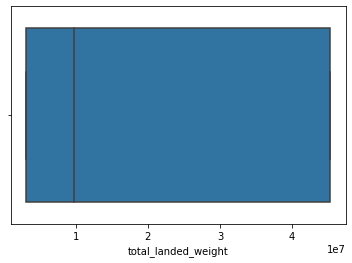

In [139]:
sns.boxplot(x='total_landed_weight',data=df)

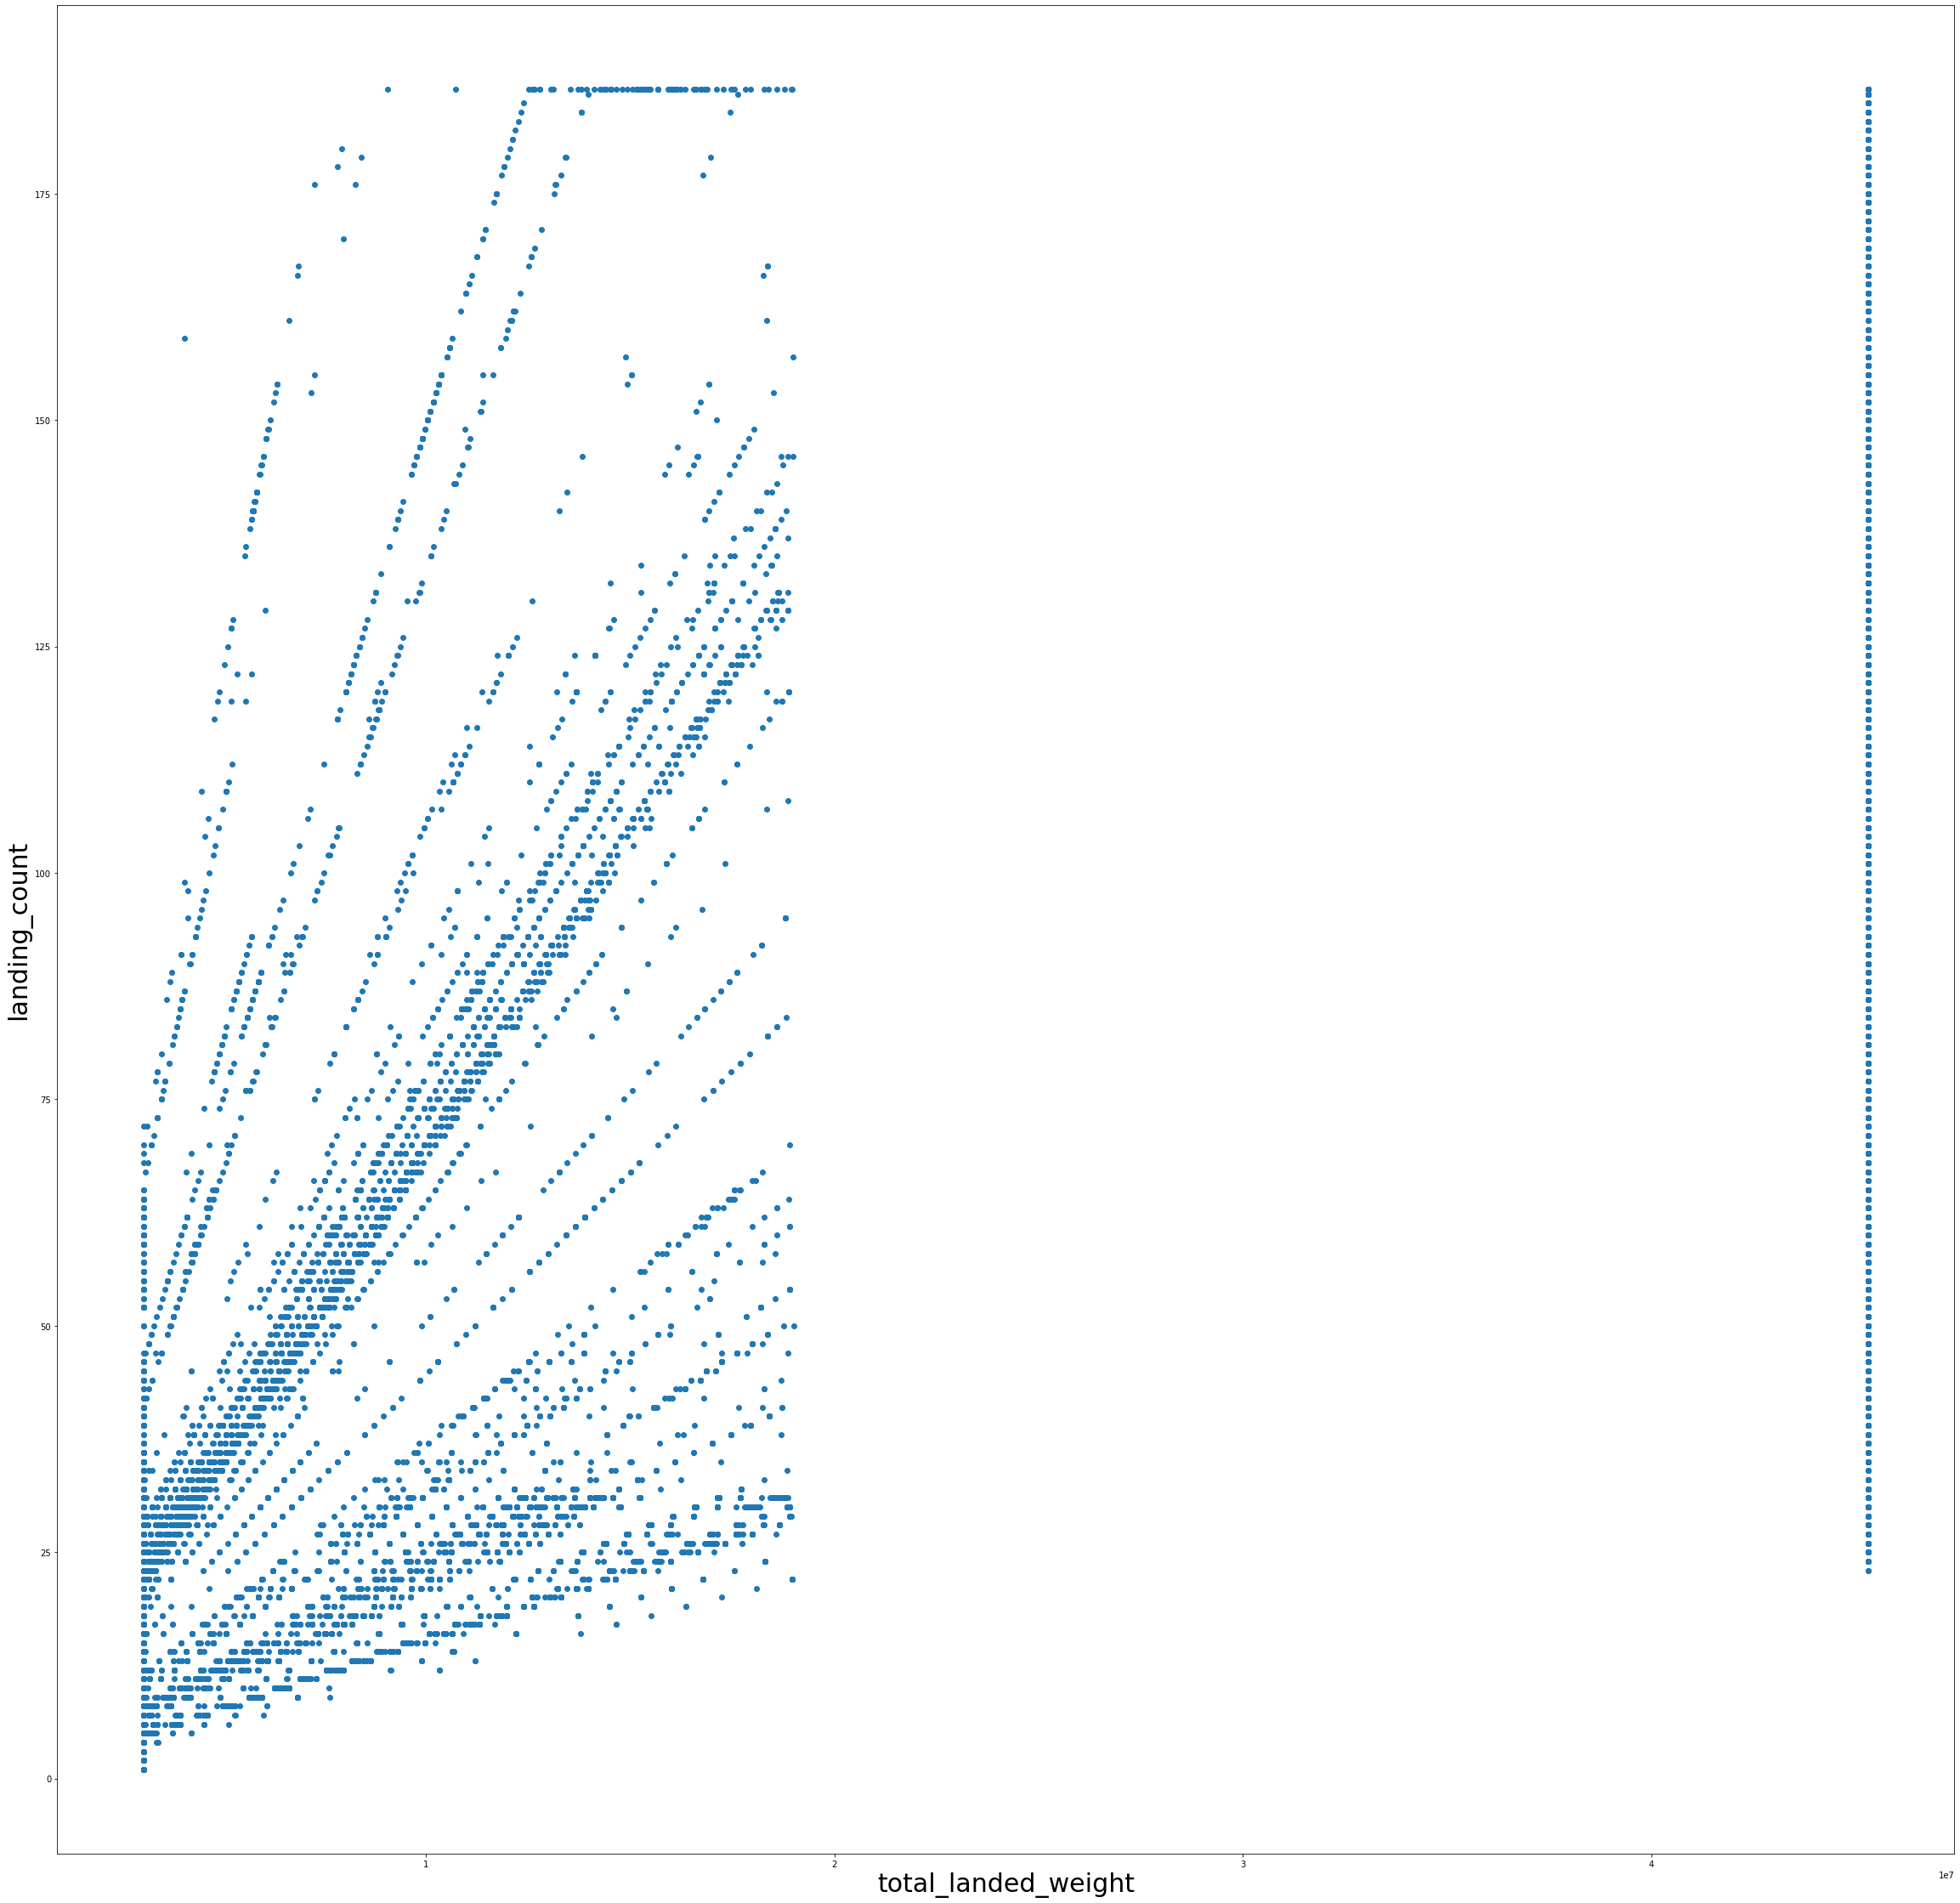

In [140]:
# Scatter plot
fig, ax = plt.subplots(figsize = (40,40))
ax.scatter(df['total_landed_weight'], df['landing_count'])
 
# x-axis label
ax.set_xlabel('total_landed_weight',fontsize=30)
 
# y-axis label
ax.set_ylabel('landing_count',fontsize=30)
plt.show()

In [142]:
df['total_landed_weight'].describe()

count    2.197200e+04
mean     1.763825e+07
std      1.716450e+07
min      3.092982e+06
25%      3.093086e+06
50%      9.736205e+06
75%      4.529897e+07
max      4.529897e+07
Name: total_landed_weight, dtype: float64

<AxesSubplot:xlabel='total_landed_weight'>

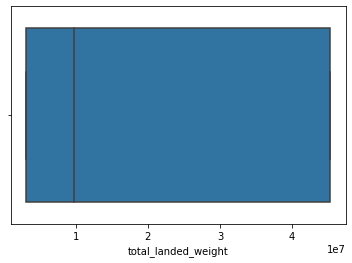

In [143]:
sns.boxplot(x='total_landed_weight',data=df)

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'landing_count'}>],
       [<AxesSubplot:title={'center':'total_landed_weight'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'month'}>, <AxesSubplot:>]],
      dtype=object)

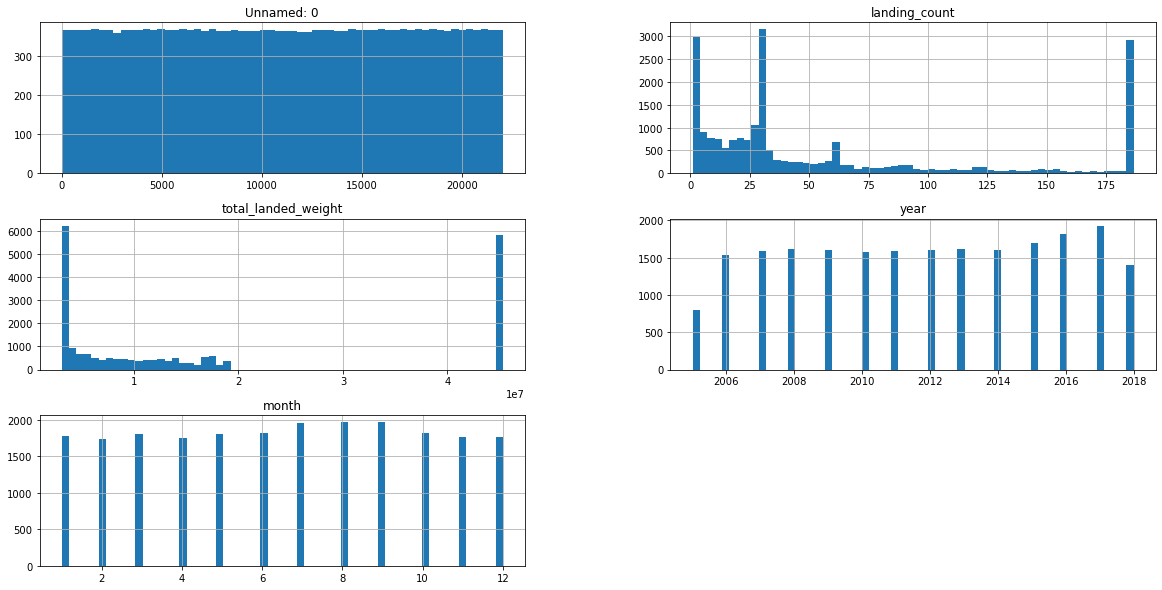

In [145]:
df.hist(bins=60,figsize=(20,10))

<AxesSubplot:xlabel='landing_count'>

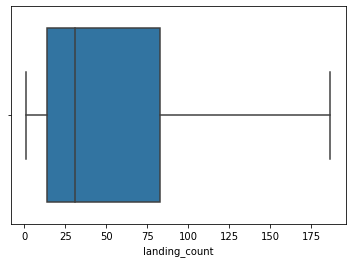

In [147]:
sns.boxplot(x='landing_count',data=df)

<AxesSubplot:>

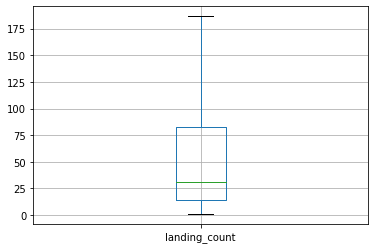

In [148]:
df.boxplot('landing_count')

In [149]:
df['landing_count'].describe()

count    21972.000000
mean        58.472738
std         62.147656
min          1.000000
25%         14.000000
50%         31.000000
75%         83.000000
max        186.500000
Name: landing_count, dtype: float64

In [152]:
df['landing_count'].value_counts()

186.5    2854
31.0     1533
1.0      1467
30.0     1205
2.0       622
         ... 
156.0       8
160.0       8
183.0       8
172.0       8
161.0       8
Name: landing_count, Length: 187, dtype: int64

In [160]:
df.describe()

,Unnamed: 0,landing_count,total_landed_weight,year,month
count,21972.000000,21972.000000,2.197200e+04,21972.000000,21972.000000
mean,11027.958720,58.472738,1.763825e+07,2011.838294,6.544966
std,6369.294668,62.147656,1.716450e+07,3.889527,3.411652
min,0.000000,1.000000,3.092982e+06,2005.000000,1.000000
25%,5508.750000,14.000000,3.093086e+06,2008.000000,4.000000
50%,11025.500000,31.000000,9.736205e+06,2012.000000,7.000000
75%,16550.250000,83.000000,4.529897e+07,2015.000000,9.000000
max,22046.000000,186.500000,4.529897e+07,2018.000000,12.000000


In [161]:
df.shape

(21972, 15)

In [163]:
df.isnull().sum()

Unnamed: 0                     0
operating_airline              0
operating_airline_iata_code    0
published_airline              0
published_airline_iata_code    0
geo_summary                    0
geo_region                     0
landing_aircraft_type          0
aircraft_body_type             0
aircraft_manufacturer          0
aircraft_model                 0
landing_count                  0
total_landed_weight            0
year                           0
month                          0
dtype: int64

In [164]:
#data visulation